This notebook was created to investigate how pitches and loudnesses in our training data were related.

In [1]:
import os
import pickle
import numpy as np

In [13]:
paramfolder = '../data/DDSPViolin-clipped3/params/train'
midifolder = '../data/DDSPViolin-clipped3/midi/train'

In [92]:
set([os.path.splitext(f)[0][f.index('Mvt')+4:f.index('Mvt')+5] for f in os.listdir(paramfolder)])

{'2', '3', '4'}

In [83]:
def getxy(mvt):
    params = []
    midis = []
    while len(midis) < 100:
        f_id = os.path.splitext(np.random.choice(os.listdir(paramfolder)))[0]
        if not('Mvt_{}'.format(mvt) in f_id):
            continue
        parampath = os.path.join(paramfolder, f_id + '.p')
        midipath = os.path.join(midifolder, f_id + '.p')

        param = pickle.load(open(parampath, 'rb'))
        midi = pickle.load(open(midipath, 'rb'))
        params.append(param)
        midis.append(midi)
    Y = np.concatenate([param['loudness_db'] for param in params])
    X = np.concatenate([midi['pitches'] for midi in midis])
    X = X[np.where(X != 0)]
    Y = Y[np.where(X != 0)]
    x = X - X.mean()
    y = Y - Y.mean()
    r = np.inner(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return X, Y, r

-0.029867722


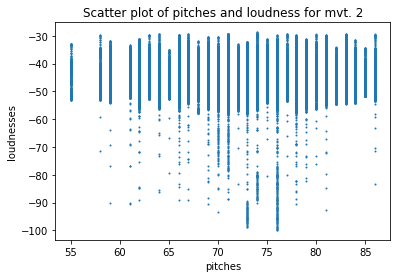

0.03944047


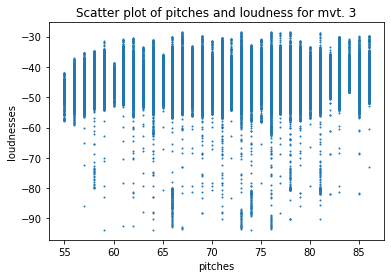

0.060997304


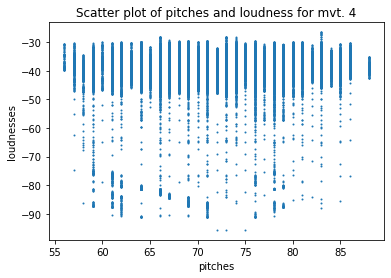

In [91]:
X, Y, r = getxy(2)
plt.scatter(X, Y, s=1)
plt.xlabel('pitches')
plt.ylabel('loudnesses')
plt.title('Scatter plot of pitches and loudness for mvt. 2')
print(r)
plt.show()
X, Y, r = getxy(3)
plt.scatter(X, Y, s=1)
plt.xlabel('pitches')
plt.ylabel('loudnesses')
plt.title('Scatter plot of pitches and loudness for mvt. 3')
print(r)
plt.show()
X, Y, r = getxy(4)
plt.scatter(X, Y, s=1)
plt.xlabel('pitches')
plt.ylabel('loudnesses')
plt.title('Scatter plot of pitches and loudness for mvt. 4')
print(r)
plt.show()